In [16]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]
import seaborn as sns

In [4]:
from math import exp, ceil

In [5]:
%matplotlib inline

In [6]:
class Option:
    def __compute_width(self):
        dt = (ceil(float(365)/self.term_unit))/float(self.term_step_count)
        M = exp(-self.reversion_rate * dt) - 1.0
        jmax = int((-0.184 / M) + 1)
        return 2*jmax+1
    
    def __compute_height(self):
        return int(self.term_step_count * (ceil(float(365)/self.term_unit)) * self.maturity) + 1
    
    def __init__(self, term_unit, maturity, term_step_count, reversion_rate):
        self.term_unit = term_unit
        self.maturity = maturity
        self.term_step_count = term_step_count
        self.reversion_rate = reversion_rate
        self.width = self.__compute_width()
        self.height = self.__compute_height()

In [7]:
def get_row_list_from_string(row):
    return row.replace('[', '').replace(']', '').replace('\n', '').split(',')

def get_options_from_row_list(x):
    maturity = int(float(x[1]))
    term_unit = int(x[3])
    term_step_count = int(x[4])
    reversion_rate = float(x[5])
    return Option(term_unit, maturity, term_step_count, reversion_rate)

def get_options(filename):
    with open(filename , 'r') as f:
        return list(map(get_options_from_row_list, np.array(list(map(get_row_list_from_string, f.readlines()))).T))

In [33]:
def print_jointplots(f):
    options = get_options(f)
    op_len = len(options)

    widths = np.array(list(map(lambda o: o.width,options)))
    heights = np.array(list(map(lambda o: o.height,options)))

    h = sns.jointplot(x=widths,
              y=heights,
              kind='scatter',
              size=13,
              color='red') # bi-variate

    h.set_axis_labels('tree width', 'tree height', fontsize=16)

In [34]:
def print_datainfo(f):
    options = get_options(f)
    op_len = len(options)
    widths = np.array(list(map(lambda o: o.width,options)))
    heights = np.array(list(map(lambda o: o.height,options)))
    prods = np.sum(np.array(list(map(lambda o: o.width * o.height,options))))

    print('file: ' + f)
    print('Options count: ' + str(op_len))
    print(':::Widths:::')
    print('min: ' + str(min(widths)))
    print('max: ' + str(max(widths)))
    print('mean: {0:0.2f}'.format(np.mean(widths)))
    print('variance: {0:0.2f}'.format(np.var(widths)))
    print('standard deviation: {0:0.2f}'.format(np.std(widths)))
    # print('skewness: {0:0.2f}'.format(skew(widths)))
    # print('kurtosis: {0:0.2f}'.format(kurtosis(widths)))
    print(':::Heights:::')
    print('min: ' + str(min(heights)))
    print('max: ' + str(max(heights)))
    print('mean: {0:0.2f}'.format(np.mean(heights)))
    print('variance: {0:0.2f}'.format(np.var(heights)))
    print('standard deviation: {0:0.2f}'.format(np.std(heights)))
    # print('skewness: {0:0.2f}'.format(skew(heights)))
    # print('kurtosis: {0:0.2f}'.format(kurtosis(heights)))
    print('\n')


In [35]:
filenames = ["0_UNIFORM.in", "1_RAND.in", "2_RANDCONSTHEIGHT.in", "3_RANDCONSTWIDTH.in", 
             "4_SKEWED.in", "5_SKEWEDCONSTHEIGHT.in", "6_SKEWEDCONSTWIDTH.in", "7_RAND_HEIGHT_IN_0-3500.in",
             "8_RAND_HEIGHT_IN_0-1200.in", "9_RAND_HEIGHT_IN_50-250.in", "10_RAND_HEIGHT_IN_50-500.in", 
             "11_RAND_HEIGHT_IN_100-300.in", "12_RAND_HEIGHT_IN_100-700.in"]

# Data distributions

## UNIFORM

/usr/local/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


file: 0_UNIFORM.in
Options count: 65467
:::Widths:::
min: 47
max: 47
mean: 47.00
variance: 0.00
standard deviation: 0.00
:::Heights:::
min: 325
max: 325
mean: 325.00
variance: 0.00
standard deviation: 0.00




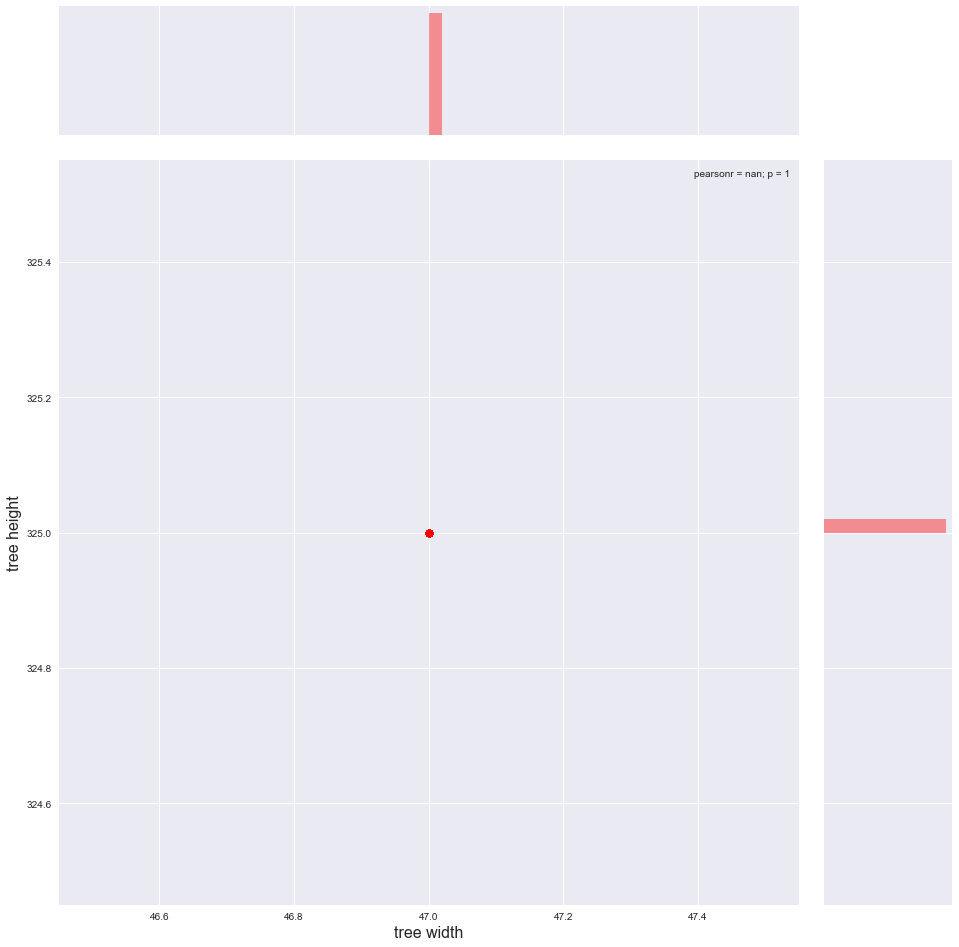

In [37]:
print_jointplots(filenames[0])
print_datainfo(filenames[0])

## RANDOM

file: 1_RAND.in
Options count: 450
:::Widths:::
min: 7
max: 1019
mean: 501.67
variance: 87953.80
standard deviation: 296.57
:::Heights:::
min: 25
max: 8737
mean: 4450.71
variance: 6022009.46
standard deviation: 2453.98




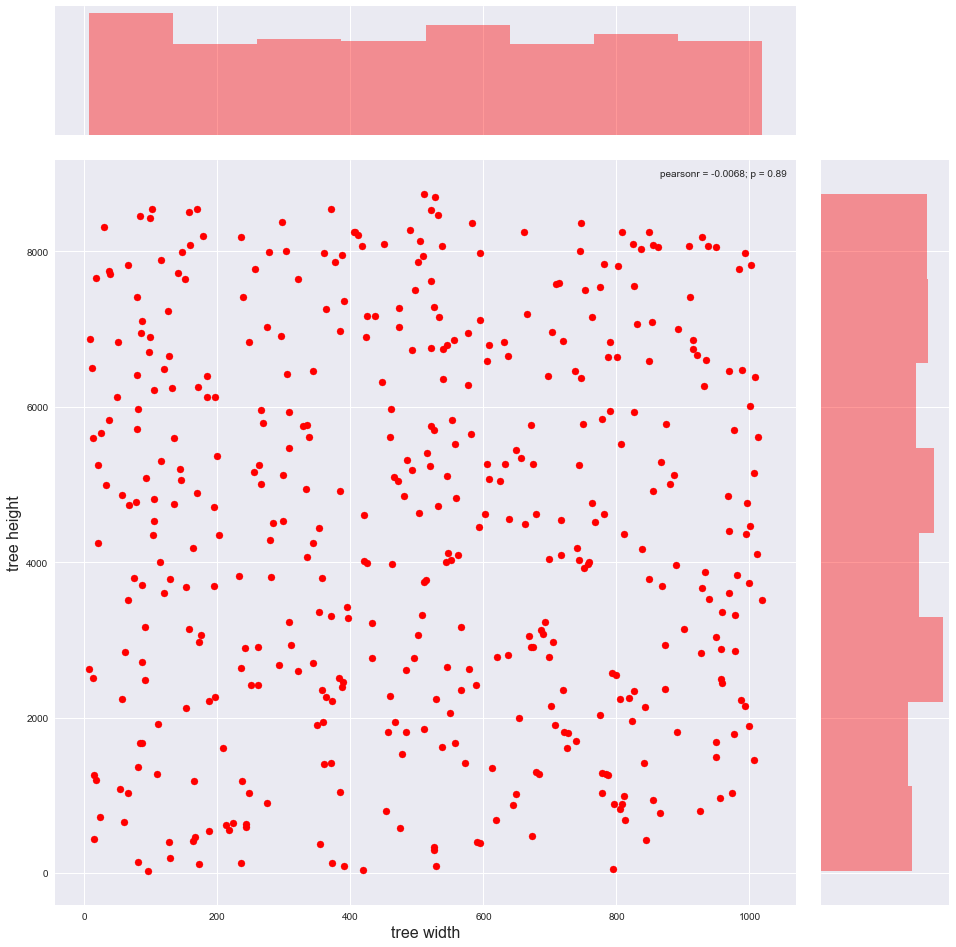

In [38]:
print_jointplots(filenames[1])
print_datainfo(filenames[1])

## RANDOM with constant heights

/usr/local/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


file: 2_RANDCONSTHEIGHT.in
Options count: 17870
:::Widths:::
min: 7
max: 1021
mean: 513.41
variance: 86929.65
standard deviation: 294.84
:::Heights:::
min: 109
max: 109
mean: 109.00
variance: 0.00
standard deviation: 0.00




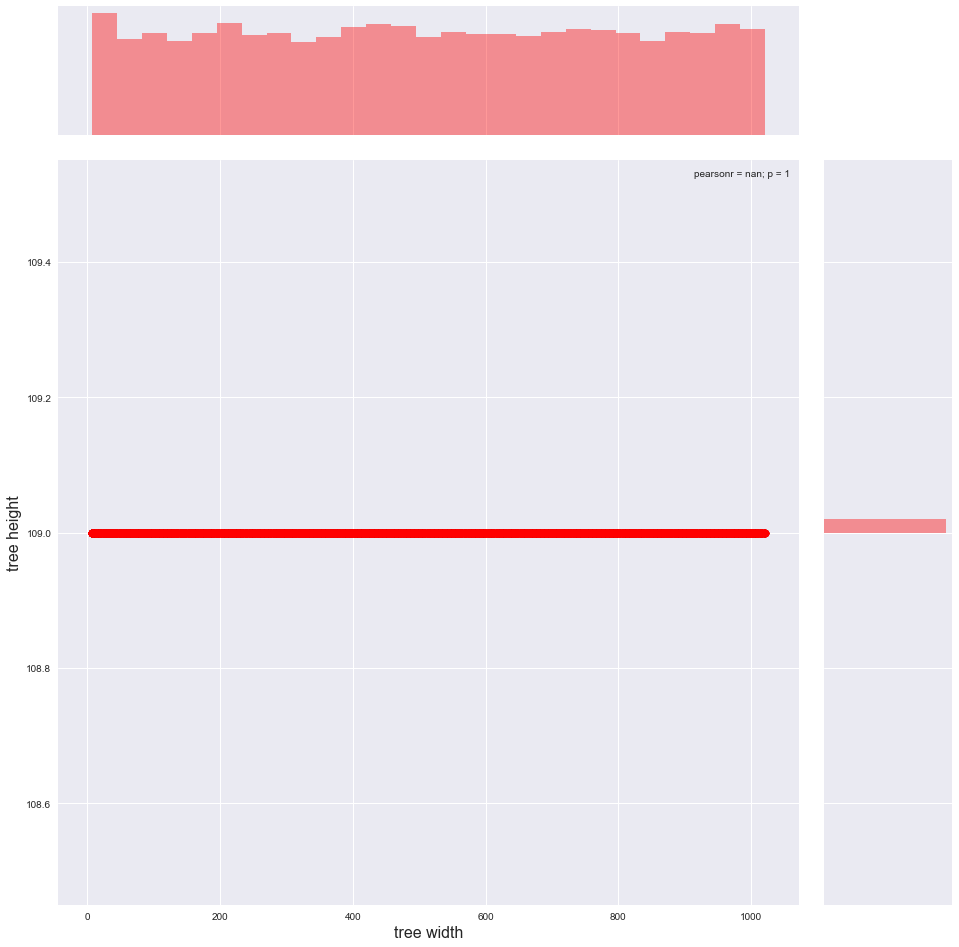

In [39]:
print_jointplots(filenames[2])
print_datainfo(filenames[2])

## RANDOM with constant widths

/usr/local/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


file: 3_RANDCONSTWIDTH.in
Options count: 4922
:::Widths:::
min: 47
max: 47
mean: 47.00
variance: 0.00
standard deviation: 0.00
:::Heights:::
min: 13
max: 8749
mean: 4323.73
variance: 6446930.31
standard deviation: 2539.08




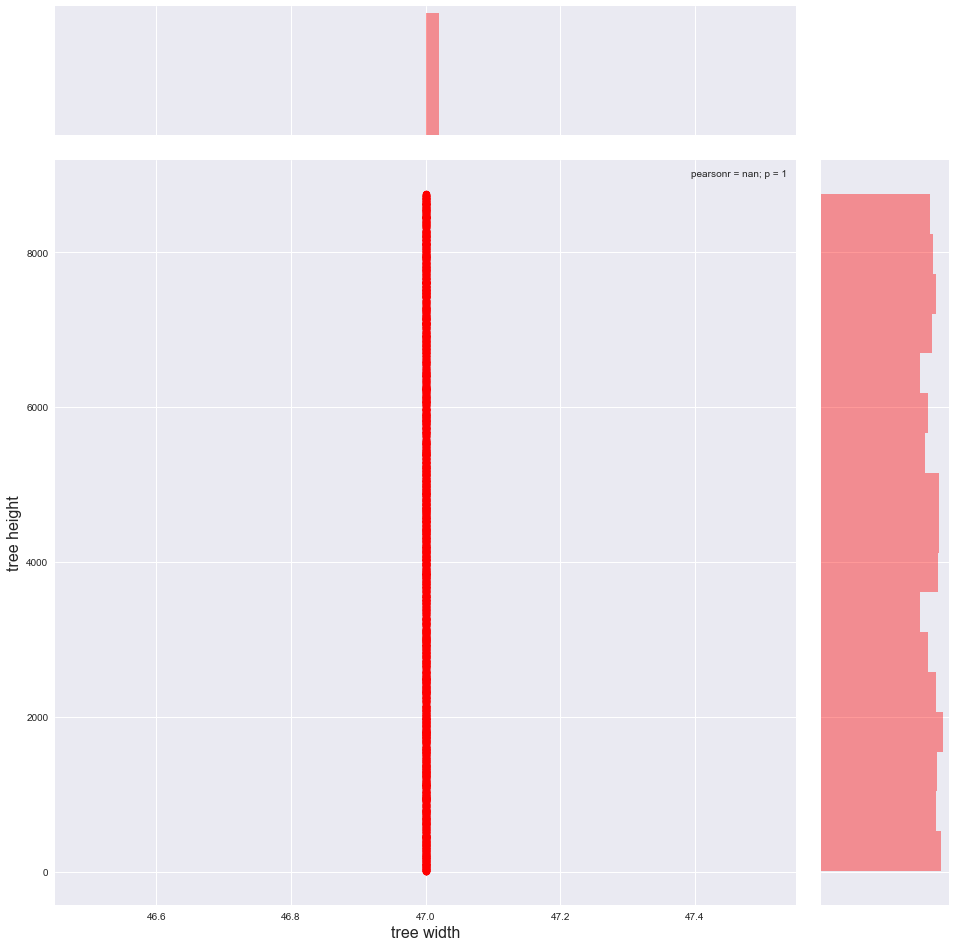

In [40]:
print_jointplots(filenames[3])
print_datainfo(filenames[3])

## SKEWED

file: 4_SKEWED.in
Options count: 8554
:::Widths:::
min: 7
max: 1019
mean: 225.29
variance: 16629.26
standard deviation: 128.95
:::Heights:::
min: 13
max: 8737
mean: 498.33
variance: 135841.93
standard deviation: 368.57




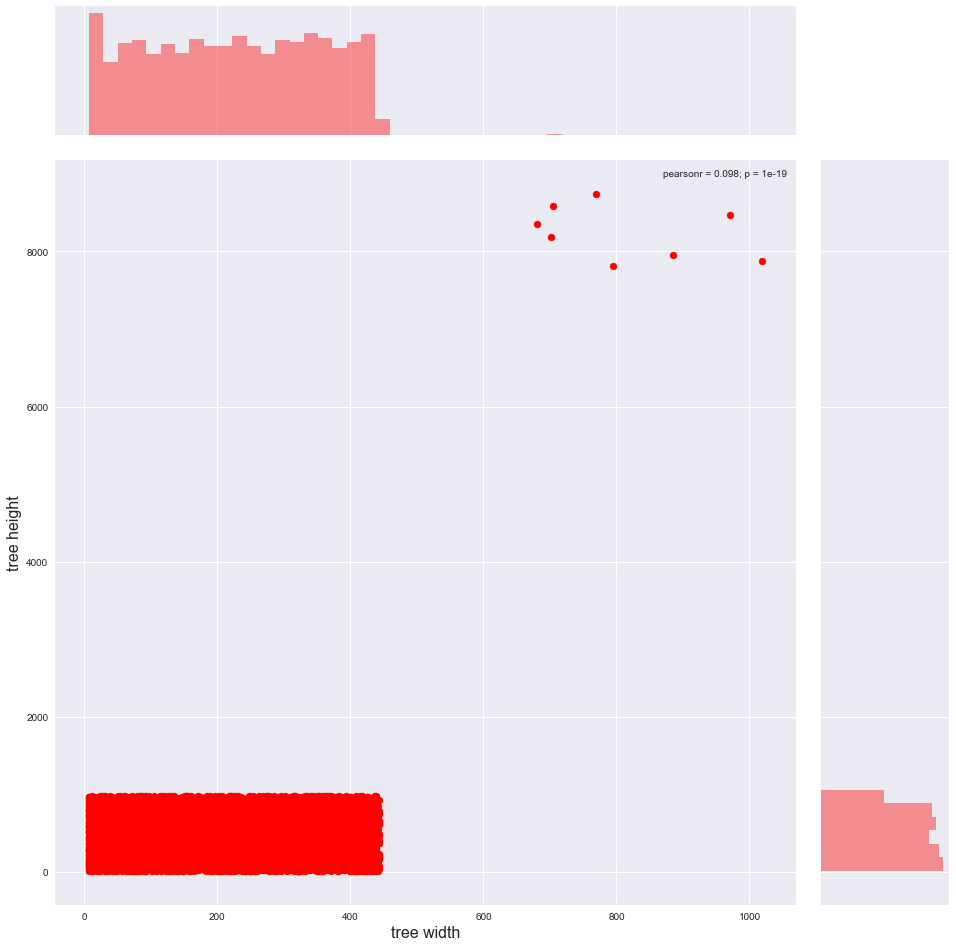

In [41]:
print_jointplots(filenames[4])
print_datainfo(filenames[4])

## SKEWED with constant height

file: 5_SKEWEDCONSTHEIGHT.in
Options count: 8999
:::Widths:::
min: 7
max: 1021
mean: 262.20
variance: 45050.81
standard deviation: 212.25
:::Heights:::
min: 13
max: 973
mean: 477.40
variance: 82215.61
standard deviation: 286.73




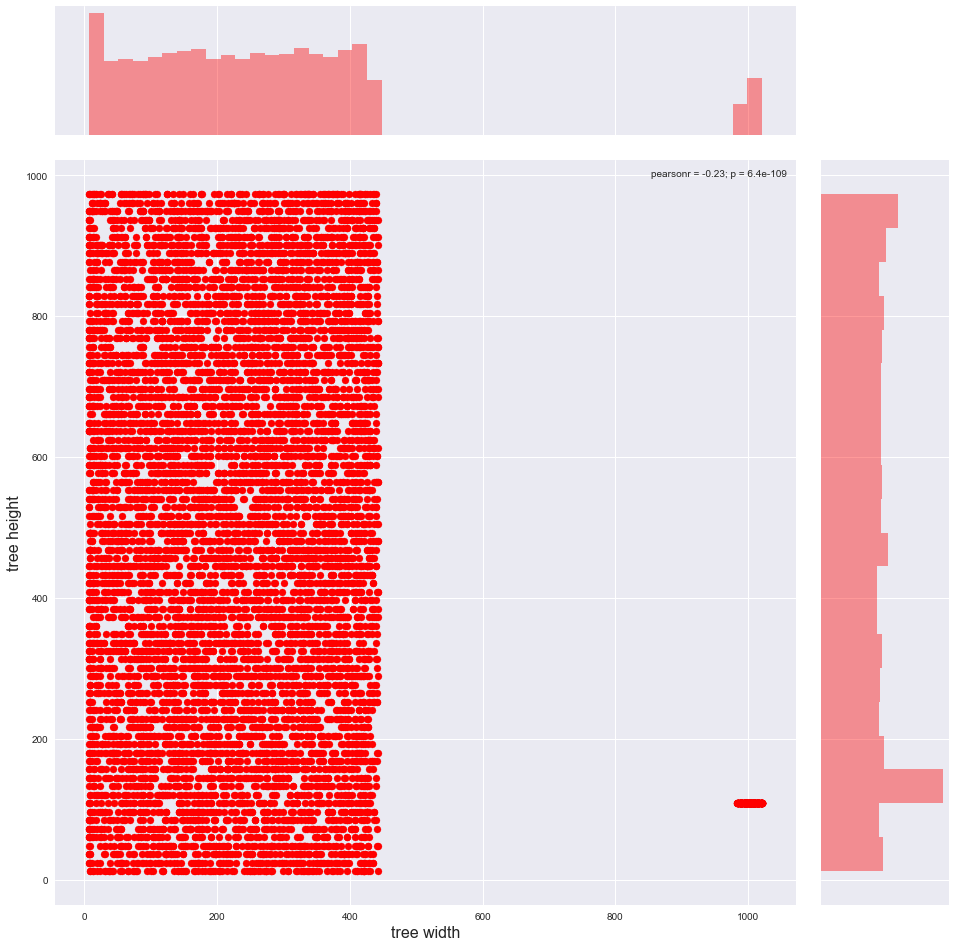

In [42]:
print_jointplots(filenames[5])
print_datainfo(filenames[5])

## SKEWED with constant width

file: 6_SKEWEDCONSTWIDTH.in
Options count: 8810
:::Widths:::
min: 7
max: 443
mean: 220.74
variance: 16369.51
standard deviation: 127.94
:::Heights:::
min: 13
max: 8737
mean: 604.73
variance: 953447.91
standard deviation: 976.45




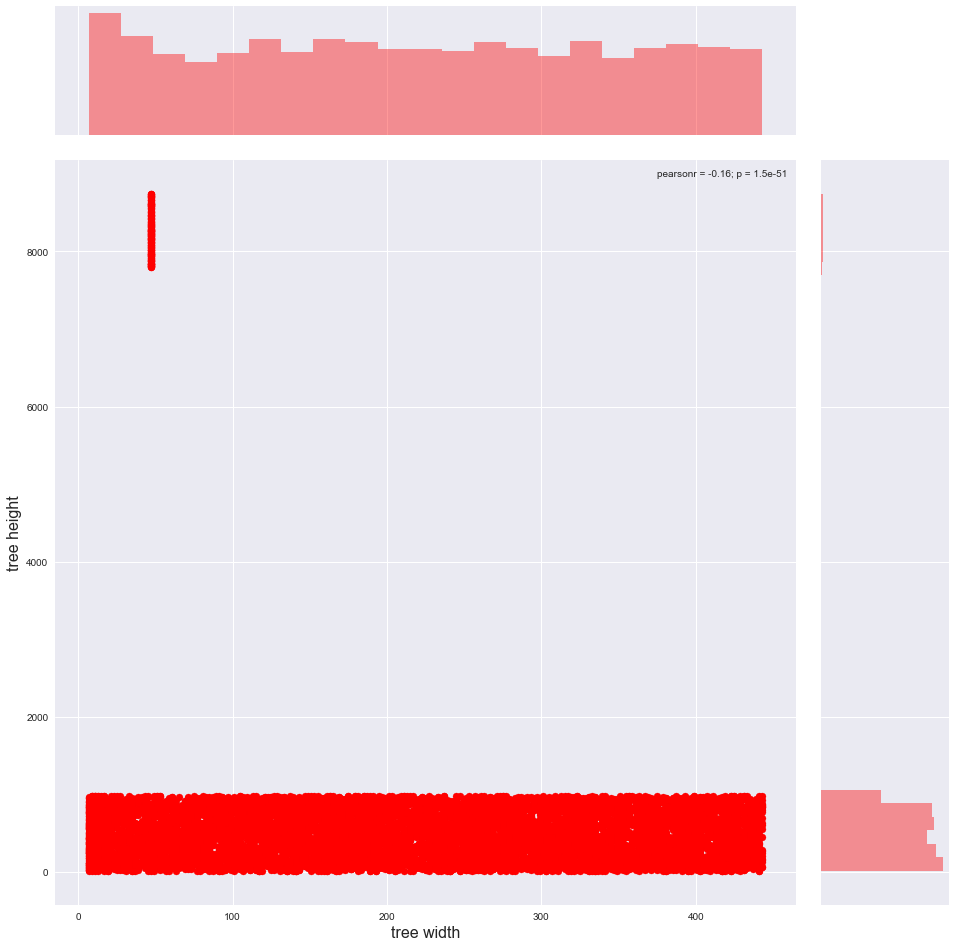

In [43]:
print_jointplots(filenames[6])
print_datainfo(filenames[6])

## RANDOM Heights in range 0-3500

file: 7_RAND_HEIGHT_IN_0-3500.in
Options count: 4438
:::Widths:::
min: 7
max: 247
mean: 122.18
variance: 5187.52
standard deviation: 72.02
:::Heights:::
min: 13
max: 3601
mean: 1833.90
variance: 1081402.48
standard deviation: 1039.91




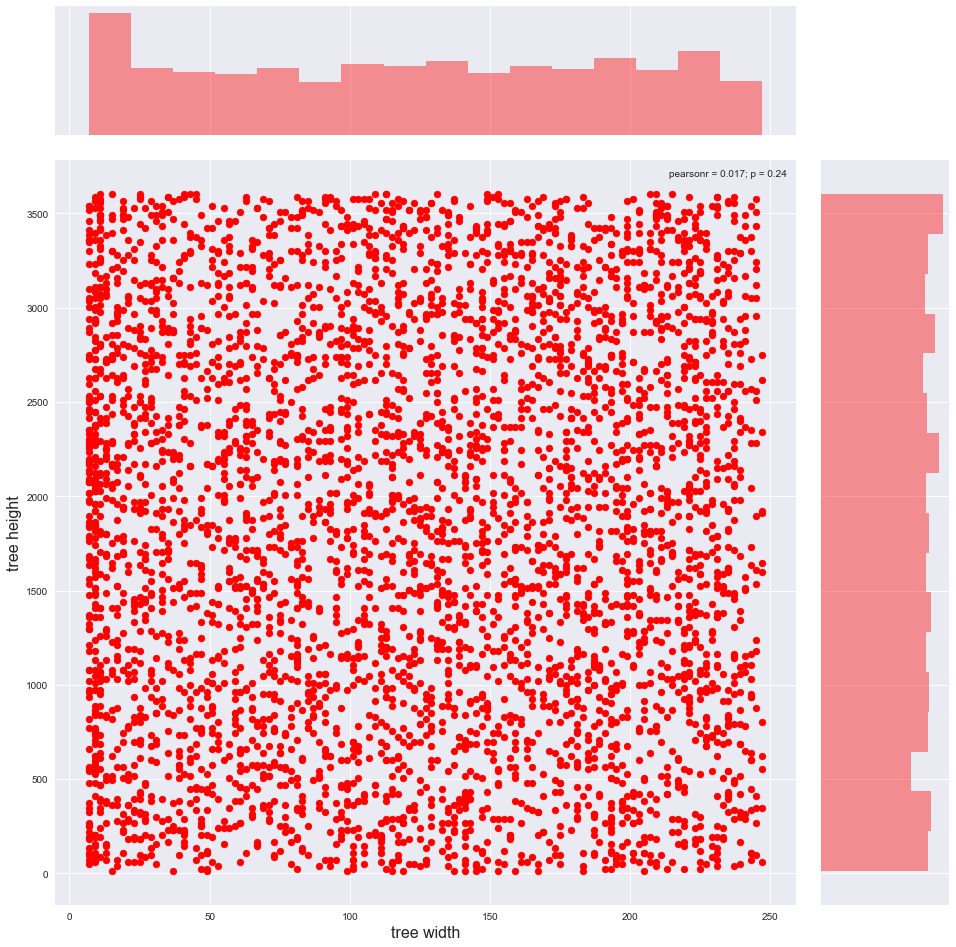

In [44]:
print_jointplots(filenames[7])
print_datainfo(filenames[7])

## RANDOM Heights in range 0-1200

file: 8_RAND_HEIGHT_IN_0-1200.in
Options count: 13316
:::Widths:::
min: 7
max: 247
mean: 123.22
variance: 5083.37
standard deviation: 71.30
:::Heights:::
min: 13
max: 1201
mean: 610.03
variance: 121423.81
standard deviation: 348.46




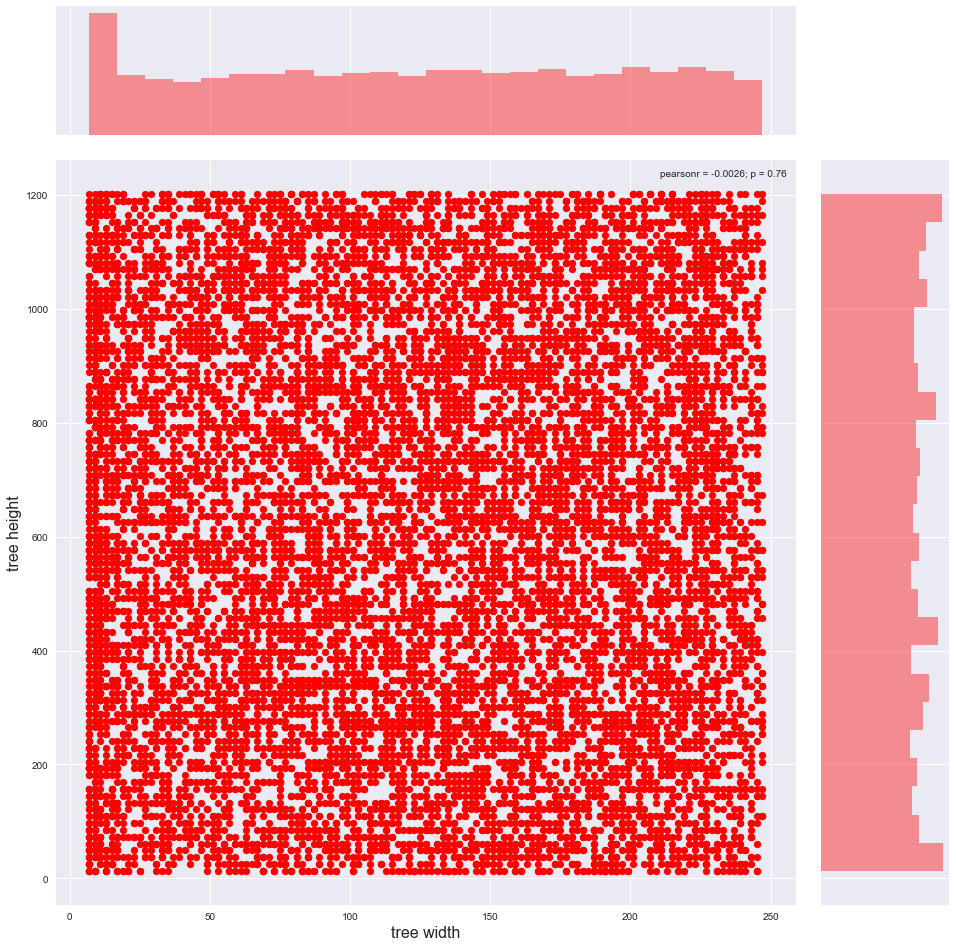

In [45]:
print_jointplots(filenames[8])
print_datainfo(filenames[8])

## RANDOM Heights in range 50-250

file: 9_RAND_HEIGHT_IN_50-250.in
Options count: 55649
:::Widths:::
min: 7
max: 247
mean: 123.59
variance: 5111.20
standard deviation: 71.49
:::Heights:::
min: 49
max: 241
mean: 145.22
variance: 3467.15
standard deviation: 58.88




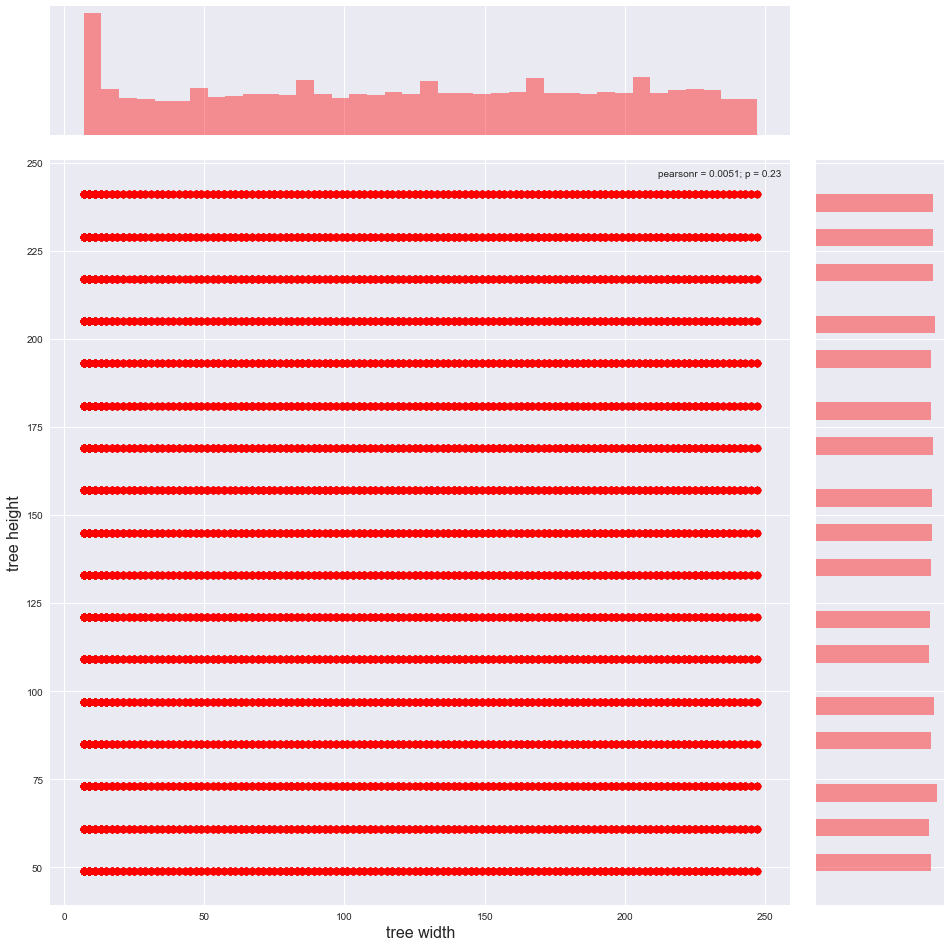

In [46]:
print_jointplots(filenames[9])
print_datainfo(filenames[9])

## RANDOM Heights in range 50-500

file: 10_RAND_HEIGHT_IN_50-500.in
Options count: 27380
:::Widths:::
min: 7
max: 247
mean: 123.73
variance: 5128.55
standard deviation: 71.61
:::Heights:::
min: 49
max: 541
mean: 294.60
variance: 21051.40
standard deviation: 145.09




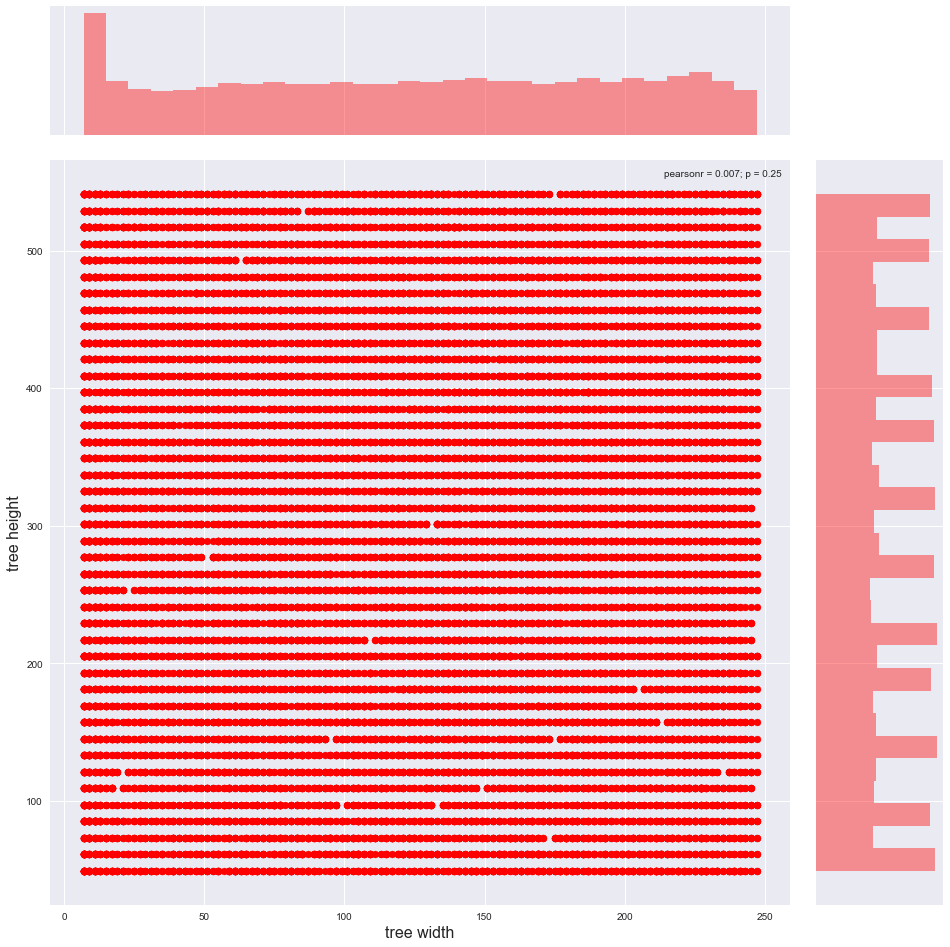

In [47]:
print_jointplots(filenames[10])
print_datainfo(filenames[10])

## RANDOM Heights in range 100-300

file: 11_RAND_HEIGHT_IN_100-300.in
Options count: 40608
:::Widths:::
min: 7
max: 247
mean: 123.78
variance: 5114.33
standard deviation: 71.51
:::Heights:::
min: 97
max: 301
mean: 199.01
variance: 3873.55
standard deviation: 62.24




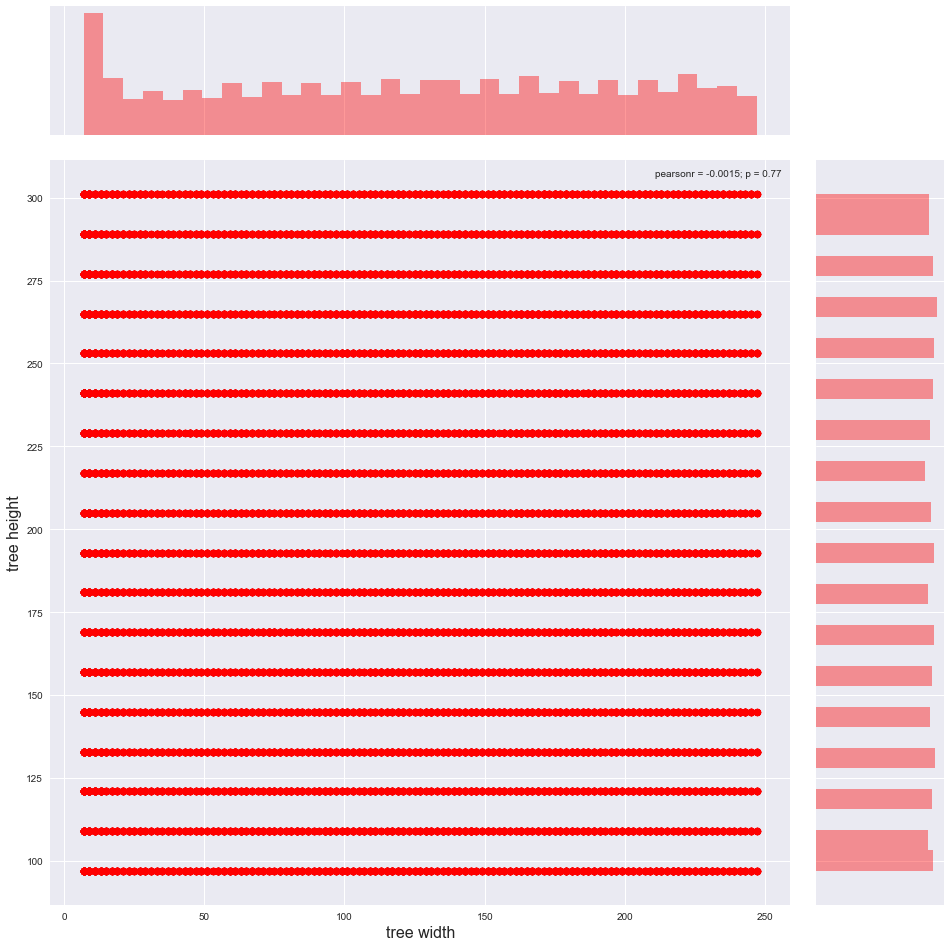

In [48]:
print_jointplots(filenames[11])
print_datainfo(filenames[11])

## RANDOM Heights in range 100-700

file: 12_RAND_HEIGHT_IN_100-700.in
Options count: 19801
:::Widths:::
min: 7
max: 247
mean: 123.16
variance: 5097.98
standard deviation: 71.40
:::Heights:::
min: 97
max: 721
mean: 410.36
variance: 33501.35
standard deviation: 183.03




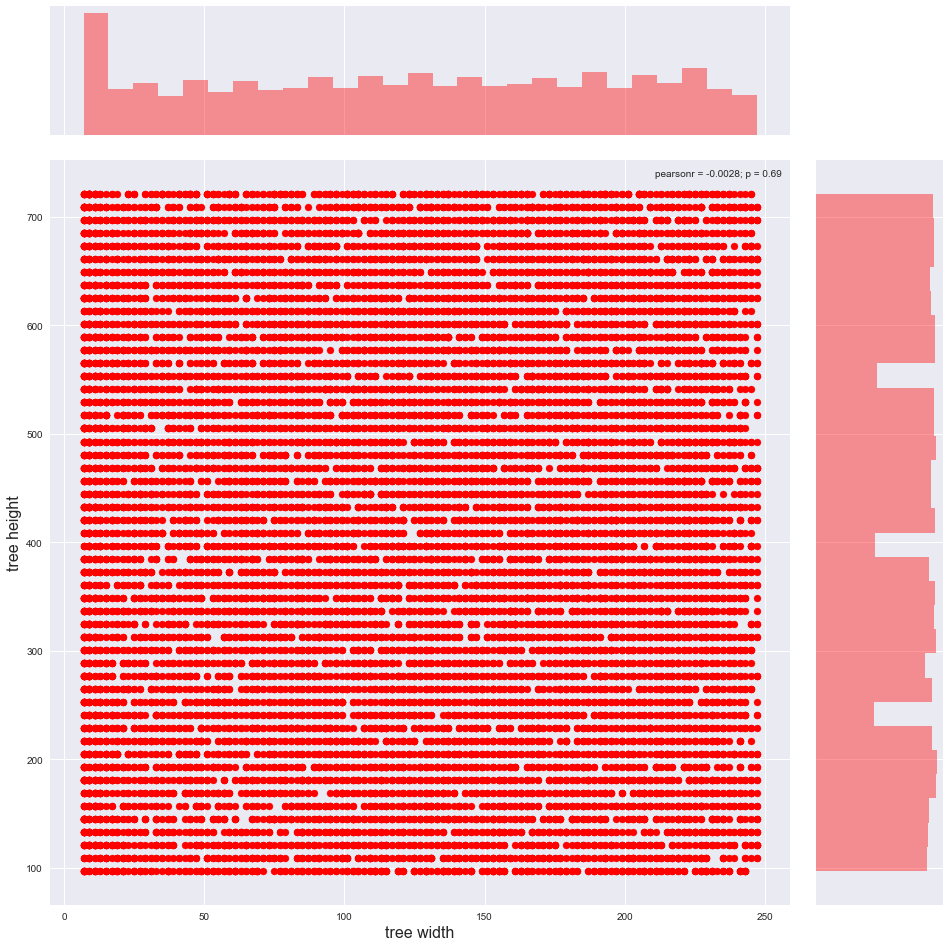

In [49]:
print_jointplots(filenames[12])
print_datainfo(filenames[12])

# DATA SETS BY WOJCIECH

In [51]:
w_filenames = ["rand_h_unif_w_100000.in",
"rand_hw_100000.in",
"rand_w_unif_h_100000.in",
"skew_h_1_rand_w_100000.in",
"skew_h_10_rand_w_100000.in",
"skew_hw_1_100000.in",
"skew_hw_10_100000.in",
"skew_w_1_rand_h_100000.in",
"skew_w_10_rand_h_100000.in",
"unif_book_hw_100000.in",
"unif_hw_100000.in"]
w_filenames = list(map(lambda f: 'wmp/data/100000/' + f, w_filenames))

In [53]:
#print_jointplots(w_filenames[0])
#print_datainfo(w_filenames[0])